## TODO

do violinplots for each dimension

color stuff nicely -> who used PSD, who guessed right?, their big five personalities

ASC function TODOs

Continue thereafter with cleaning

## Placebos, Psychedelics and Honest Reporting

This notebook will review the data presented in the 2020 study ['Tripping on nothing: placebo psychedelics and contextual factors'](https://link.springer.com/article/10.1007/s00213-020-05464-5#Fig2) published in Psychopharmacology. The paper was presented in an online meeting of Oldenburg's UniMind group in February 2021. Most notably, it contained the graph shown below, which I find appauling, for three reasons:

1. The graph is cluttered, yet does not convey relevant information
2. The authors compare **individual** 5D-ASC scores with **means** from other studies
3. The authors dropped two participants, reportedly because their 5D-ASC scores were too high before the experiment

<div>
<br>
<br>

<img src="figure2.jpg" alt="figure2" width="700"/>

</br>
</br>
</div>

Luckily, the data of all 33 participants is provided along the publication, free for everyone to download. This means that we can take a look at the [data](https://osf.io/xqtnh/) ourselves.

### Importing python's powers and dabest

These libraries come with all the popular python distributions, except for dabest, which offers a beautiful way of visualizing group differences that we will use later.

In [1]:
import scipy.io as io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dabest as db

### Loading and inspecting the data

In [2]:
df = pd.read_csv('placebo-psychedelics.csv')
print(df.head(),'\n'*3, 'columns: ', [column for column in df.columns])

   session       sid time  asc.1  asc.2  asc.3  asc.4  asc.5  asc.6  asc.7  \
0        1  3328873f  pre      5      0      0      0      0      0      0   
1        1  a6461ad9  pre      7      7      9      6      8     10      8   
2        1  7d23b332  pre      6      0      0      0      2      0      0   
3        1  5745068b  pre      0      0      0      0      0      0      0   
4        1  a913adc7  pre      0      0      0      0      0      0      0   

   ...    hr  bp.sys  bp.dia  bfi.e  bfi.a  bfi.c  bfi.n  bfi.o  \
0  ...  74.0   148.0    74.0   12.0   40.0   23.0   27.0   43.0   
1  ...  64.0   129.0    73.0   27.0   33.0   25.0   20.0   42.0   
2  ...  74.0   135.0    62.0   25.0   27.0   30.0   24.0   33.0   
3  ...  72.0   131.0    53.0   36.0   36.0   25.0   21.0   35.0   
4  ...  82.0   117.0    70.0   33.0   30.0   38.0   27.0   43.0   

   used.psychedelics  guessed.psychedelic  
0                NaN                  NaN  
1                NaN                  Na

After loading and inspecting the data, we notice several things. 

1. we see that answers to the 94 5D-ASC questions are indicated individually, i.e. scores are not yet grouped into the 11 dimensions intoduced by Studerus et al. in 2010. 
2. there are 33 participants that underwent 2 measurement sessions each. Wether the data belongs to the timepoint before or after the placebo session is indicated in the 'time'-column by 'pre' and 'post'
3. there is a lot of data that was not reported on in the study

Seems like we have some major data-janitoring to do.

### From 100, make eleven

The 5D-ASC is comprised of 94 questuions that were originally grouped into 5 dimensions and regrouped [into 11](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2930851/) in 2010. Online, one can find two versions of the questionnaire that differ in the question's indices, i.e. their ordering. Of course, when first writing the function below, I used the ordering the authors of "Tripping on nothing" did not use. However, after realizing this, I was able to locate this other version online. In the end, this only made my function more versatile.

In [3]:
def asc_summation(array, pp = True, studerus = False):
    """
    takes in an array of answers to asc and sums them 
    into the 11 validated subscales by Studerus et al., 2010
    
    array: a 2D array containing participants and answers to questions
    answers must be in order
    
    pp indcates if this should be done in a per-participant manner
    studerus indicates wether the original encoding or the other one was used
    """
    
    #indexes for 11 dimensions
    if studerus == True:
        
        """Studerus et al., 2010, python indexing already handled"""
        
        unity = np.array([ 9, 20, 26, 27, 34])
        spiritual = np.array([ 5, 55, 65])
        bliss = np.array([ 6, 59, 64])
        insight =   np.array([33, 45, 51])
        disembodiment = np.array([14, 41, 42])
        impaired_cc = np.array([ 4, 15, 23, 32, 43, 44, 52])
        anxiety = np.array([18, 28, 29, 31, 37, 62])
        imagery_com = np.array([24, 48, 56])
        imagery_elem = np.array([ 7, 12, 19])
        synesthesia = np.array([10, 13, 50])
        changed_meaning = np.array([16, 17, 36])
        
    else:
        
        """This version can be readily found online, and used in placebo paper"""
        """-1 for python indexing"""
        
        unity = np.array([ 18, 34, 41, 42, 52]) - 1
        spiritual = np.array([ 9, 81, 94]) - 1
        bliss = np.array([ 12, 86, 91]) - 1
        insight =   np.array([50, 69, 77]) - 1
        disembodiment = np.array([26, 62, 63]) - 1 
        impaired_cc = np.array([8, 27, 38, 47, 64, 67, 78]) - 1
        anxiety = np.array([32, 43, 44, 46, 56, 89]) - 1
        imagery_com = np.array([14, 22, 33]) - 1
        imagery_elem = np.array([ 7, 12, 19]) - 1
        synesthesia = np.array([20, 13, 75]) - 1
        changed_meaning = np.array([28, 31, 54]) - 1
        
        
    #dimensions = [unity, spiritual, bliss, insight, disembodiment, impaired_cc, anxiety, 
    #imagery_com, imagery_elem, synesthesia, changed_meaning]
    
    dimensions = [anxiety, spiritual, insight, impaired_cc, disembodiment, unity, 
                  bliss, changed_meaning, imagery_com, synesthesia, imagery_elem]

    
    if pp == True:
        
        array11 = np.zeros((len(array), 11))
        
        for pp in range(len(array11)):
            
            for idx, dimension in enumerate(dimensions):
                
                array11[pp, idx] = np.sum(array[pp, dimension]) / len(dimension)


    else:
        #TODO calculate total 
        pass
    
    return array11
    

## Refactoring

We basically want the same structure as in the original dataframe, but with single answers replaced by 11 dimensions.
Also, splitting the table into pre- and post-experience measures would be handy as well.

In [4]:
# get all answers, ie columns 3 to 97
answers = np.array(df.iloc[:,3:97])

# calculating the 11 dimensions from the 94 answers for each participant
dimensions11 = asc_summation(answers)

# setting up a fresh data frame 
columns = ['anxiety', 'spiritual', 'insight', 'impaired_cc', 'disembodiment', 'unity', 'bliss',
           'changed_meaning', 'imagery_com', 'synesthesia', 'imagery_elem']
df_dim = pd.DataFrame(data=dimensions11, columns=columns)

# merging the fresh data frame into the old one, replacing single answers with 11 dimensions
df2 = pd.concat([df.iloc[:,:3], df_dim, df.iloc[:,97:]], axis=1)

# splitting this into pre- and post measurements, might be convenient later
pre_df = df2[df2['time'] == 'pre']
post_df = df2[df2['time'] == 'post']

In [5]:
df2

,session,sid,time,anxiety,spiritual,insight,impaired_cc,disembodiment,unity,bliss,...,hr,bp.sys,bp.dia,bfi.e,bfi.a,bfi.c,bfi.n,bfi.o,used.psychedelics,guessed.psychedelic
0,1,3328873f,pre,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,74.0,148.0,74.0,12.0,40.0,23.0,27.0,43.0,NaN,NaN
1,1,a6461ad9,pre,3.833333,3.666667,3.666667,6.857143,3.666667,4.0,4.333333,...,64.0,129.0,73.0,27.0,33.0,25.0,20.0,42.0,NaN,NaN
2,1,7d23b332,pre,4.000000,0.000000,0.000000,0.285714,0.000000,3.6,0.000000,...,74.0,135.0,62.0,25.0,27.0,30.0,24.0,33.0,NaN,NaN
3,1,5745068b,pre,2.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,72.0,131.0,53.0,36.0,36.0,25.0,21.0,35.0,NaN,NaN
4,1,a913adc7,pre,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,82.0,117.0,70.0,33.0,30.0,38.0,27.0,43.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2,9b38e74a,post,1.333333,0.000000,0.000000,2.285714,0.000000,1.2,0.000000,...,69.0,126.0,86.0,30.0,30.0,27.0,29.0,49.0,True,maybe
62,2,b4dec09d,post,1.666667,2.000000,1.666667,3.142857,2.000000,2.4,1.666667,...,64.0,102.0,63.0,25.0,35.0,31.0,11.0,33.0,False,maybe
63,2,ea1a12d0,post,0.000000,4.000000,6.000000,0.000000,0.000000,0.0,13.333333,...,56.0,101.0,84.0,34.0,43.0,39.0,16.0,47.0,True,yes
64,2,0454bd12,post,0.500000,2.333333,2.000000,1.142857,1.666667,0.6,1.333333,...,64.0,150.0,72.0,26.0,41.0,30.0,13.0,42.0,True,no


### Finding the outliers
The study mentions that two ouliers were removed, because their 5D-ASC scores were too high to begin with. Throwing away data, just because you do not like it, is frequentist nonsense. We can find these outliers by asking the column 'exclude.asc'.

In [6]:
# looking at the outliers
df2[df2['exclude.asc'] == True]

,session,sid,time,anxiety,spiritual,insight,impaired_cc,disembodiment,unity,bliss,...,hr,bp.sys,bp.dia,bfi.e,bfi.a,bfi.c,bfi.n,bfi.o,used.psychedelics,guessed.psychedelic
20,2,94b99891,pre,0.833333,17.666667,3.666667,4.714286,0.666667,6.2,1.000000,...,72.0,152.0,99.0,25.0,32.0,22.0,29.0,50.0,True,maybe
26,2,d5c693a4,pre,2.333333,15.000000,1.333333,0.857143,2.000000,8.8,27.000000,...,77.0,123.0,77.0,31.0,29.0,34.0,21.0,40.0,NaN,maybe
53,2,94b99891,post,1.166667,13.666667,3.333333,0.857143,1.000000,0.8,3.666667,...,80.0,119.0,78.0,25.0,32.0,22.0,29.0,50.0,True,maybe
59,2,d5c693a4,post,9.000000,1.333333,3.000000,9.428571,0.000000,18.4,6.333333,...,58.0,113.0,75.0,31.0,29.0,34.0,21.0,40.0,NaN,maybe


## Reproducing Figure 2

For a start, let's reproduce the abovementioned figure, figure 2. Its description says: "changes in experience after consuming the placebo..". So I would say this figure shows the pre-experience measures subracted from the post-exerience measures, right? Why else would they have taken these pre-measures?

In [7]:
# changes in experience after placebo consumption
prearr = np.array(pre_df.iloc[:,3:14]) # pre placebo
postarr = np.array(post_df.iloc[:,3:14]) # post placebo

change = postarr - prearr
#print(np.round(change))

In [8]:
# get averages across participants for each dimension
preaverage = np.sum(prearr, axis = 0)/33
postaverage = np.sum(postarr, axis = 0)/33

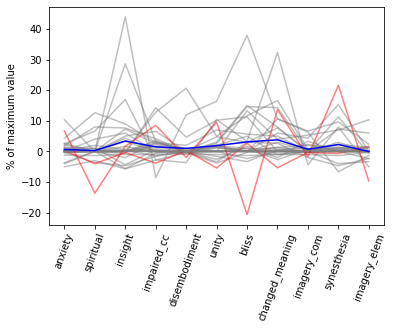

In [20]:
for i in range(len(change)):
    
    if (i == 20) | (i == 26):
        plt.plot(change[i], color = 'red', alpha = 0.5) # lets make the outliers red
    
    else:
        plt.plot(change[i], color = 'grey', alpha = 0.5) # lets make this grey for less confusion

plt.plot(postaverage-preaverage, color = 'blue') # plot the average changes in blue
plt.xticks(np.arange(len(columns)), columns, rotation = 70)
plt.ylabel('% of maximum value')
#plt.savefig('changes_in_exp_pre_post.jpeg', bbox_inches = 'tight')
plt.show()
#fig2 = mpimg.imread('figure2.JPG')
#plt.imshow(fig2)

Looking at the original figure:
<div>
<br>
<br>

<img src="figure2.jpg" alt="figure2" width="500" align = "left"/>

</br>
</br>
</div>
There seem to be some differences between the original figure and our reproduced version:
<ul>
<li>In our version, the centrally located average across all dimensions is missing. We will leave the average for later though.</li>
<li>In our version, a lot of measures are below zero, namely in all the cases where participants reported higher scores on the quesionnaire. In the original graph, this is not the case.</li>
</ul>
Looking at our outliers in red, we not that:
<ul>
<li>We clearly see how one of our outliers gave interesting answers, with the bliss and spritual dimensions way lower after the experience than before, but with many other measures acutally higher than baseline.</li>
<li>Our second outlier is acutually not that special compared with some of the other participants
</ul>

### A closer look at the outliers

As mentioned above, the outliers were excluded due to having too altered states of consciousness prior to consuming the placebo. Lets see how altered they were, compared to all the other participants.

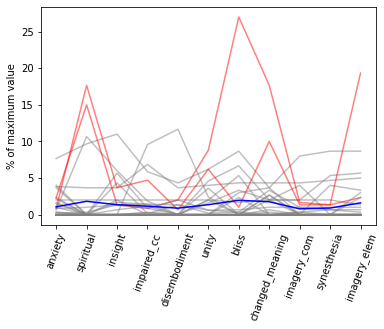

<Figure size 432x288 with 0 Axes>

In [10]:
for i in range(len(change)):
    
    if (i == 20) | (i == 26):
        plt.plot(prearr[i], color = 'red', alpha = 0.5) # lets make the outliers red
    
    else:
        plt.plot(prearr[i], color = 'grey', alpha = 0.5) # lets make this grey for less confusion

plt.plot(preaverage, color = 'blue') # plot the pre-average in blue
plt.xticks(np.arange(len(columns)), columns, rotation = 70)
plt.ylabel('% of maximum value')
plt.show()

Just from visual inspection, it seems like one of the outliers was particularly blissful before the experiment and was already experiencing elementary imagery (seeing patterns such as lattices, cobwebs, spirals). His other measures, as well as the other outlier, however, seem to match the overall variability of the group.

### Can we actually reproduce figure 2?

Looking at the graphs so far, I have the slight suspicion that Olson and colleagues did not actually plot the **changes** in experience after consuming the placebo, but rather the **bare** measures from after consumption, without comparing to baseline. Lets try to plot these ourselves and see if we can reproduce figure 2 this way.

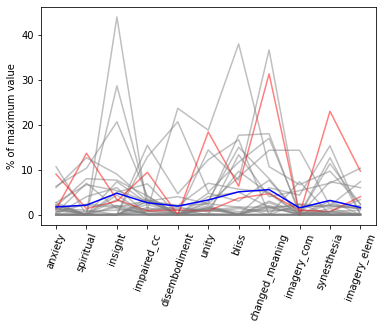

In [19]:
for i in range(len(change)):
    
    if (i == 20) | (i == 26):
        plt.plot(postarr[i], color = 'red', alpha = 0.5) # lets make the outliers red
    
    else:
        plt.plot(postarr[i], color = 'grey', alpha = 0.5) # lets make this grey for less confusion

plt.plot(postaverage, color = 'blue') # plot the pre-average in blue
plt.xticks(np.arange(len(columns)), columns, rotation = 70)
plt.ylabel('% of maximum value')
#plt.savefig('figure2_new.png', bbox_inches = 'tight')
plt.show()

Looking at the original figure:
<div>
<br>
<br>

<img src="figure2.jpg" alt="figure2" width="500" align ="left"/>

</br>
</br>
</div>

# Under construction

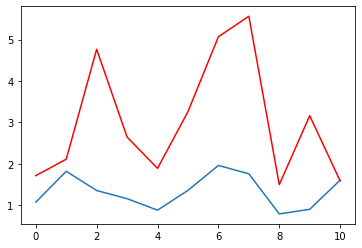

In [21]:
plt.plot(preaverage)
plt.plot(postaverage, color = 'red')

In [34]:
pretotal = np.sum(prearr, axis = 1)/11
posttotal =  np.sum(postarr, axis = 1)/11
df_prepostot = pd.DataFrame(np.array([pretotal, posttotal, [i for i in range(len(pretotal))]]).T)
df_prepostot.columns = ['pretotal', 'posttotal', 'idx']
df_prepostot['guessed.psychedelic'] = predf['guessed.psychedelic']

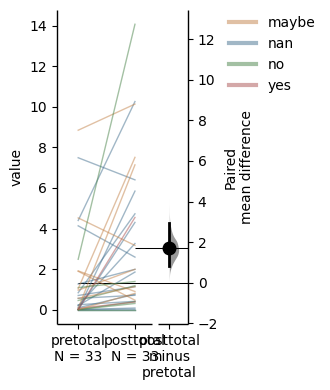

In [36]:
pre_post_total = db.load(df_prepostot, idx = ( 'pretotal', 'posttotal'), paired = True, id_col = 'idx')
pre_post_total.mean_diff.plot(color_col = 'guessed.psychedelic')
plt.show()

C:\Users\gffun\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


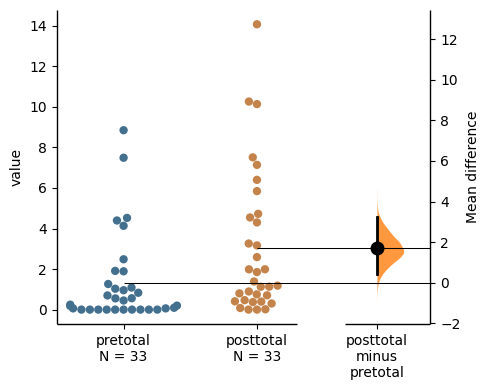

In [26]:
pre_post_total = db.load(df_prepostot, idx = ( 'pretotal', 'posttotal'))
pre_post_total.mean_diff.plot()
plt.show()

In [27]:
predf = df2.loc[df2['time'] == 'pre' ]
postdf = df2.loc[df2['time'] == 'post' ].reset_index(drop = True)
postdf

,session,sid,time,anxiety,spiritual,insight,impaired_cc,disembodiment,unity,bliss,...,hr,bp.sys,bp.dia,bfi.e,bfi.a,bfi.c,bfi.n,bfi.o,used.psychedelics,guessed.psychedelic
0,1,3328873f,post,1.333333,0.000000,0.000000,3.000000,0.000000,1.6,0.000000,...,83.0,156.0,77.0,12.0,40.0,23.0,27.0,43.0,NaN,NaN
1,1,a6461ad9,post,6.333333,10.333333,20.666667,4.142857,0.000000,14.4,7.666667,...,67.0,118.0,66.0,27.0,33.0,25.0,20.0,42.0,NaN,NaN
2,1,7d23b332,post,0.000000,0.000000,5.000000,6.857143,0.000000,1.0,1.666667,...,72.0,126.0,107.0,25.0,27.0,30.0,24.0,33.0,NaN,NaN
3,1,5745068b,post,2.000000,0.000000,0.000000,1.571429,0.000000,4.8,3.000000,...,87.0,128.0,69.0,36.0,36.0,25.0,21.0,35.0,NaN,NaN
4,1,a913adc7,post,2.666667,0.000000,28.666667,3.285714,0.000000,3.0,15.000000,...,92.0,104.0,71.0,33.0,30.0,38.0,27.0,43.0,NaN,NaN
5,1,b564882b,post,0.000000,0.000000,0.000000,15.428571,4.666667,12.2,16.666667,...,75.0,131.0,57.0,25.0,33.0,23.0,30.0,46.0,NaN,NaN
6,1,ef1848c0,post,0.000000,0.000000,0.000000,2.857143,2.000000,7.0,5.666667,...,104.0,135.0,91.0,33.0,42.0,35.0,13.0,46.0,NaN,NaN
7,1,10061be1,post,0.833333,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,...,96.0,122.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,85ed9099,post,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,75.0,139.0,79.0,21.0,33.0,38.0,17.0,26.0,NaN,NaN
9,1,3fae04cc,post,0.000000,0.000000,0.000000,0.857143,0.000000,0.0,0.000000,...,90.0,130.0,80.0,25.0,37.0,36.0,21.0,42.0,NaN,NaN


In [49]:
print(postdf)

None


In [28]:
#TODO get rid of time


full_df = pd.DataFrame()
full_df['session'] = predf['session']
full_df['sid'] = predf['sid']
full_df['sid'] = predf['sid']


for column in ['anxiety', 'spiritual', 'insight',
       'impaired_cc', 'disembodiment', 'unity', 'bliss', 'changed_meaning',
       'imagery_com', 'synesthesia', 'imagery_elem',
       'panas.interested', 'panas.distressed', 'panas.excited', 'panas.upset',
       'panas.strong', 'panas.guilty', 'panas.scared', 'panas.hostile',
       'panas.enthusiastic', 'panas.proud', 'panas.irritable', 'panas.alert',
       'panas.ashamed', 'panas.inspired', 'panas.nervous', 'panas.determined',
       'panas.attentive', 'panas.jittery', 'panas.active', 'panas.afraid',
       'hr', 'bp.sys', 'bp.dia', 'bfi.e', 'bfi.a', 'bfi.c', 'bfi.n', 'bfi.o']:
    
    full_df[column + '_pre'] = predf[column]
    full_df[column + '_post'] = postdf[column]

    
full_df['used.psychedelics'] = predf['used.psychedelics']
full_df['guessed.psychedelic'] = predf['guessed.psychedelic']

print(full_df)

    session       sid  anxiety_pre  anxiety_post  spiritual_pre  \
0         1  3328873f     1.000000      1.333333       0.000000   
1         1  a6461ad9     3.833333      6.333333       3.666667   
2         1  7d23b332     4.000000      0.000000       0.000000   
3         1  5745068b     2.166667      2.000000       0.000000   
4         1  a913adc7     0.000000      2.666667       0.000000   
5         1  b564882b     0.000000      0.000000       0.000000   
6         1  ef1848c0     0.000000      0.000000       0.000000   
7         1  10061be1     0.000000      0.833333       0.000000   
8         1  85ed9099     0.000000      0.166667       0.000000   
9         1  3fae04cc     0.000000      0.000000       0.000000   
10        1  68b542b0     2.333333      2.166667       0.000000   
11        1  f3fb630e     0.000000      0.000000       0.000000   
12        1  ff9f92a1     0.666667      0.333333      10.666667   
13        1  2fef7fc4     0.000000      1.333333       0.00000

In [29]:
full_df.columns
coi =  full_df.columns[2:24]
idxs = []

for i in range(0, len(coi)-1, 2):
    idx = (coi[i], coi[i+1])
    idxs.append(idx)
    
idxs

[('anxiety_pre', 'anxiety_post'),
 ('spiritual_pre', 'spiritual_post'),
 ('insight_pre', 'insight_post'),
 ('impaired_cc_pre', 'impaired_cc_post'),
 ('disembodiment_pre', 'disembodiment_post'),
 ('unity_pre', 'unity_post'),
 ('bliss_pre', 'bliss_post'),
 ('changed_meaning_pre', 'changed_meaning_post'),
 ('imagery_com_pre', 'imagery_com_post'),
 ('synesthesia_pre', 'synesthesia_post'),
 ('imagery_elem_pre', 'imagery_elem_post')]

In [30]:
full_df_asc = db.load(full_df, idx=idxs)

C:\Users\gffun\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gffun\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gffun\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gffun\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gffun\AppData\Roaming\P

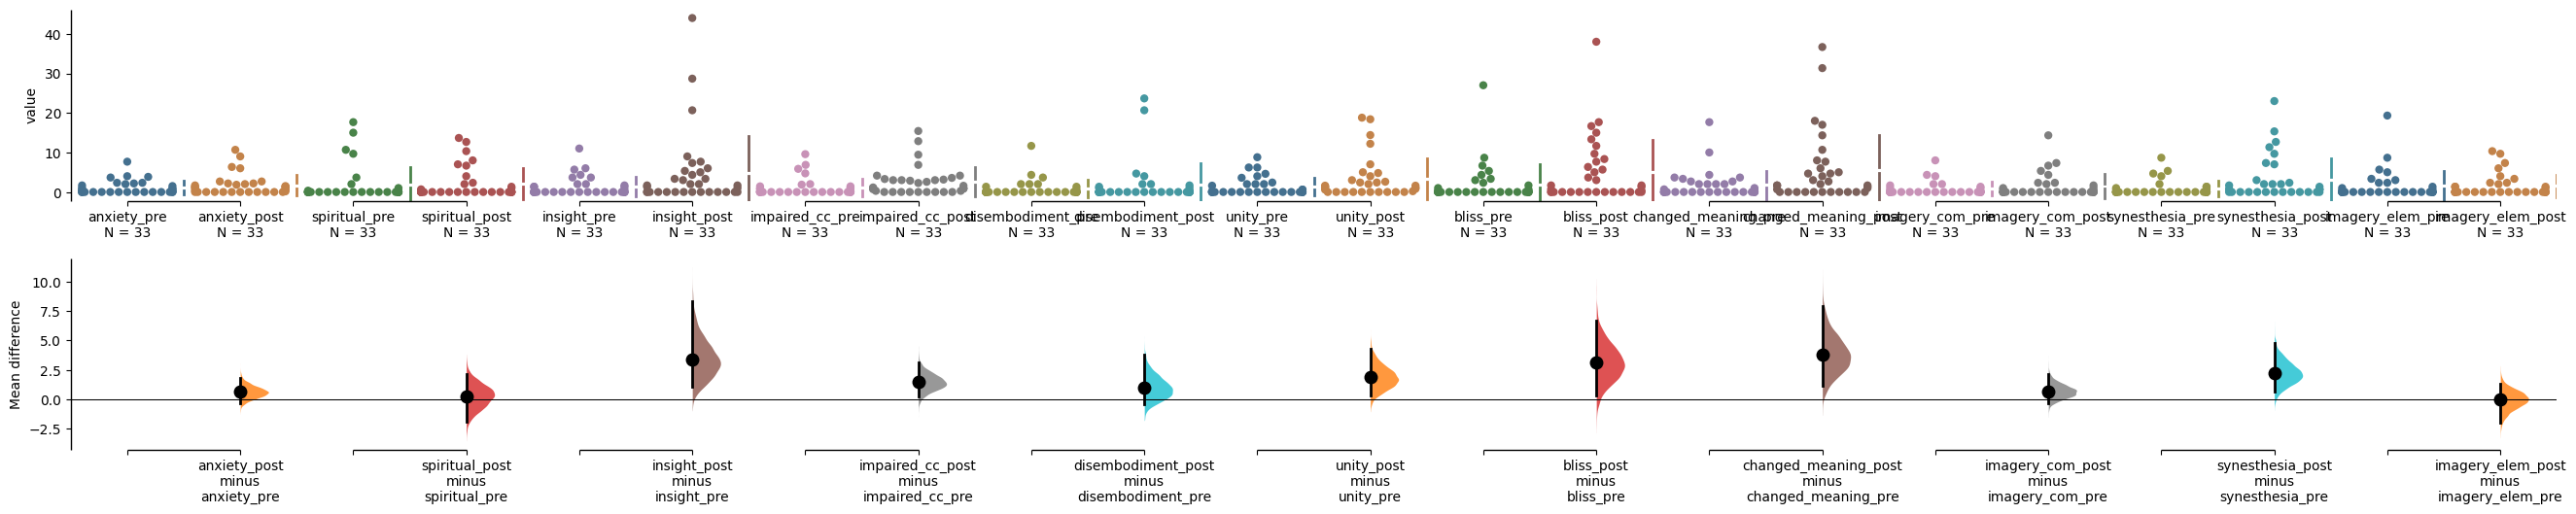

In [37]:
full_df_asc.mean_diff.plot()#color_col = 'guessed.psychedelic')
plt.show()

In [ ]:
full_df_asc_paired = db.load(full_df, idx=idxs, paired = True, id_col = 'sid')
full_df_asc_paired.mean_diff.plot(color_col = 'guessed.psychedelic')
plt.show()

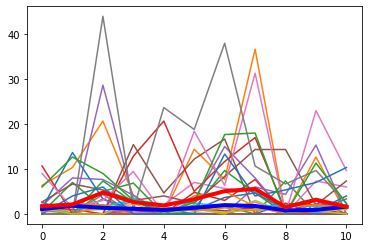

In [20]:
for i in range(len(postarr)):
    
    plt.plot(postarr[i])
    
plt.plot(preaverage, color = 'blue', lw = 4)
plt.plot(postaverage, color = 'red', lw = 4)